In [7]:
# Import Libraries and Dataset

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
df_ords_final = pd.read_pickle(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Data/Prepared Data/orders_products_customers.pkl')

In [10]:
# Checking

In [11]:
df_ords_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   user_id                1000000 non-null  int64   
 1   first_name             1000000 non-null  object  
 2   last_name              1000000 non-null  object  
 3   sex                    1000000 non-null  object  
 4   state                  1000000 non-null  object  
 5   age                    1000000 non-null  int64   
 6   date_joined            1000000 non-null  object  
 7   n_dependants           1000000 non-null  int64   
 8   fam_status             1000000 non-null  object  
 9   income                 1000000 non-null  int64   
 10  order_id               1000000 non-null  int64   
 11  order_number           1000000 non-null  int64   
 12  orders_day_of_week     1000000 non-null  int64   
 13  order_hour_of_day      1000000 non-null  int64   
 14  day

In [12]:
# drop first_name and last_name due to PII data concerns
df_ords_final = df_ords_final.drop(columns=['first_name', 'last_name'])

In [13]:
df_ords_final.head()

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,Busiest days,Most orders,8,New customer,11.4,High spender,14.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Regularly days,Most orders,8,New customer,11.4,High spender,14.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Busiest days,Most orders,8,New customer,11.4,High spender,14.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Regularly days,Most orders,8,New customer,11.4,High spender,14.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,11.4,High spender,14.0,Regular customer,both


In [14]:
# defining regions based on state geographical location

In [15]:
region=[]
for value in df_ords_final['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [16]:
# create new column for region

In [17]:
df_ords_final['region'] = region

In [138]:
df_ords_final['region'].value_counts(dropna = False)

South        336951
West         253881
Midwest      232353
Northeast    176815
Name: region, dtype: int64

In [18]:
# Checking

In [19]:
df_ords_final.head()

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Most orders,8,New customer,11.4,High spender,14.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly days,Most orders,8,New customer,11.4,High spender,14.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,11.4,High spender,14.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly days,Most orders,8,New customer,11.4,High spender,14.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Slowest days,Most orders,8,New customer,11.4,High spender,14.0,Regular customer,both,Midwest


In [20]:
# create cross tab for region and spending flag

In [21]:
region_spend_crosstab = pd.crosstab(df_ords_final['region'], df_ords_final['spending_flag'], dropna = False)

In [22]:
region_spend_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,21196,211157
Northeast,16972,159843
South,29166,307785
West,22247,231634


In [23]:
# create new column customer_activity to identify low-activity customers

In [24]:
df_ords_final.loc[df_ords_final['max_order']>=5,'customer_activity']='High-activity customer'
df_ords_final.loc[df_ords_final['max_order']<5,'customer_activity']='Low-activity customer'

In [25]:
# Subset for High-activity customers

In [26]:
high_act_cus = df_ords_final[df_ords_final['customer_activity']=='High-activity customer']

In [27]:
# Checking

In [28]:
high_act_cus

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Most orders,8,New customer,11.400000,High spender,14.0,Regular customer,both,Midwest,High-activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,11.400000,High spender,14.0,Regular customer,both,Midwest,High-activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,11.400000,High spender,14.0,Regular customer,both,Midwest,High-activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Most orders,8,New customer,11.400000,High spender,14.0,Regular customer,both,Midwest,High-activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,11.400000,High spender,14.0,Regular customer,both,Midwest,High-activity customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,19707,Female,Montana,27,4/1/2020,3,married,80165,268747,7,...,Most orders,7,New customer,11.883333,High spender,29.5,Non-frequent customer,both,West,High-activity customer
999994,19707,Female,Montana,27,4/1/2020,3,married,80165,2721243,1,...,Average orders,7,New customer,11.883333,High spender,29.5,Non-frequent customer,both,West,High-activity customer
999995,20302,Female,Arkansas,39,4/1/2020,1,married,63509,2850042,5,...,Average orders,7,New customer,12.133333,High spender,30.0,Non-frequent customer,both,South,High-activity customer
999996,20302,Female,Arkansas,39,4/1/2020,1,married,63509,1349657,6,...,Average orders,7,New customer,12.133333,High spender,30.0,Non-frequent customer,both,South,High-activity customer


In [29]:
# Export dataframe as Pickle

In [30]:
high_act_cus.to_pickle(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Data/Prepared Data/orders_products_customers_final.pkl')

In [31]:
#creating an age flag

In [32]:
df_ords_final.loc[df_ords_final['age']>65,'age_flag'] = 'Senior'

In [33]:
df_ords_final.loc[(df_ords_final['age']<=65) & (df_ords_final['age']>44),'age_flag'] = 'Middle Age'

In [34]:
df_ords_final.loc[df_ords_final['age']<=45,'age_flag'] = 'Young Adult'

In [35]:
# Checking 

In [36]:
df_ords_final['age_flag'].value_counts(dropna = False)

Young Adult    438909
Middle Age     312921
Senior         248170
Name: age_flag, dtype: int64

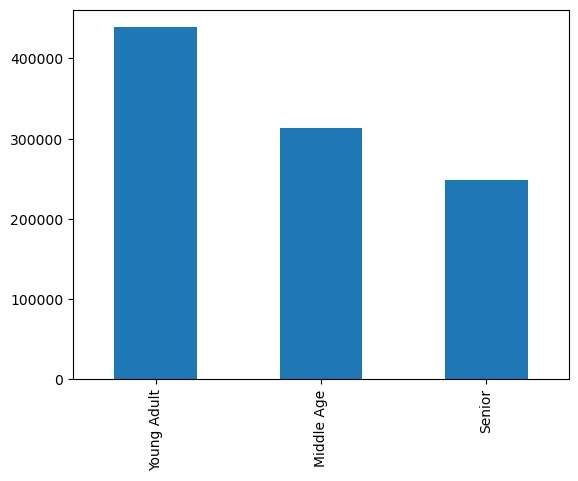

In [37]:
age_bar = df_ords_final['age_flag'].value_counts().plot.bar()

In [38]:
# Creating a crosstab and bar between age and region

In [39]:
region_age=pd.crosstab(df_ords_final['region'],df_ords_final['age_flag'],dropna=False)

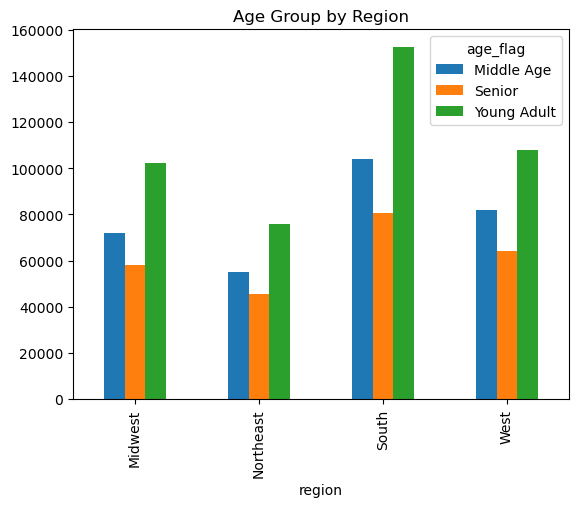

In [101]:
regions_age=region_age.plot.bar()
plt.title('Age Group by Region')
plt.show()

In [41]:
# creating a crosstab between department and age

In [42]:
department_age=pd.crosstab(df_ords_final['department_id'],df_ords_final['age_flag'],dropna=False,)

In [43]:
department_age

age_flag,Middle Age,Senior,Young Adult
department_id,,,
1.0,5302,4547,8081
3.0,1161,977,1671
4.0,216584,173470,304031
6.0,169,168,271
7.0,8605,6503,11951
11.0,87,93,97
12.0,78,94,132
13.0,4529,3701,6427
14.0,1016,745,1410


In [44]:
# creating bar charts for department segments

In [45]:
department_names = {1: 'Frozen', 2: 'Other', 3: 'Bakery', 4: 'Produce',5: 'Alcohol', 6: 'International',7: 'Beverages', 8:'Pets',9:'Dry Goods Pasta',10: 'Bulk', 11: 'Personal Care', 12: 'Meat/Seafood', 13: 'Pantry', 14: 'Breakfast',15:'Canned Goods', 16: 'Dairy/Eggs', 17: 'Household', 18: ' Babies', 19:'Snacks',20:'Deli',21:'Missing'}

In [46]:
department_values = df_ords_final['department_id'].value_counts()

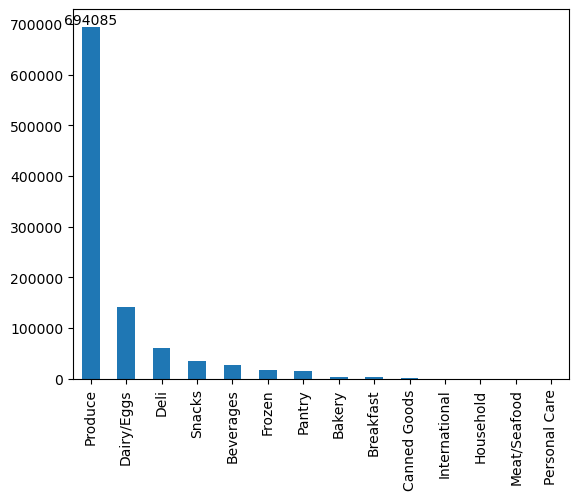

In [47]:
df_dep = ax = department_values.plot.bar()
ax.set_xticklabels([department_names.get(x, '') for x in department_values.index])
for i, v in enumerate(department_values):
    ax.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

In [48]:
# create a bar chart for income level

In [49]:
df_ords_final['income'].describe()

count    1000000.000000
mean       98013.011823
std        41329.506210
min        26024.000000
25%        65915.000000
50%        95933.000000
75%       126435.000000
max       593901.000000
Name: income, dtype: float64

In [50]:
df_ords_final.loc[df_ords_final['income'] >= 40000 & (df_ords_final['income'] < 80000), 'income_level'] = 'Moderate-income'

In [51]:
df_ords_final.loc[df_ords_final['income']<40000,'income_level']='Low-income'

In [52]:
df_ords_final.loc[df_ords_final['income']>= 80000,'income_level']='High-income'

In [137]:
df_ords_final['income_level'].value_counts(dropna = False)

High-income        631711
Moderate-income    311065
Low-income          57224
Name: income_level, dtype: int64

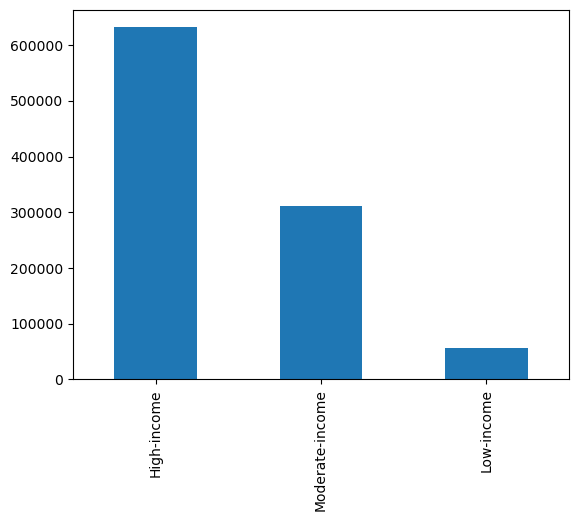

In [54]:
income_bar = df_ords_final['income_level'].value_counts().plot.bar()

In [ ]:
# Creating a bar chart for Income Level by Region

In [55]:
region_income=pd.crosstab(df_ords_final['region'],df_ords_final['income_level'], dropna=False)

In [56]:
region_income = region_income.reindex(['Low-income', 'Moderate-income', 'High-income'], 
     axis="columns")

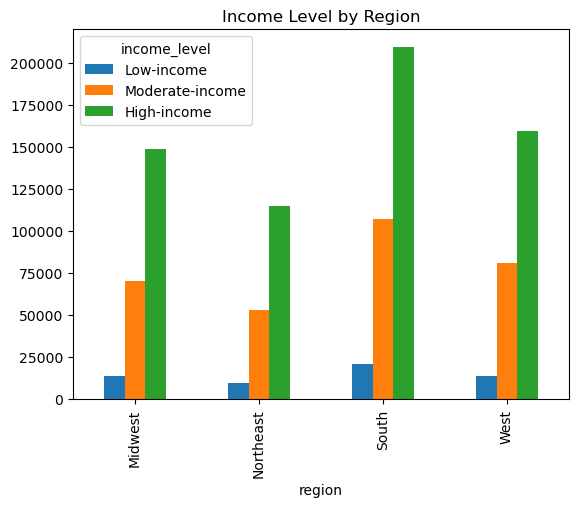

In [105]:
regions_income=region_income.plot.bar()
plt.title('Income Level by Region')
plt.show()

In [ ]:
# Creating a bar chart for customers who has kids or not

In [58]:
kids = [1,2,3]

In [64]:
no_kids = [0]

In [60]:
df_ords_final.loc[df_ords_final['n_dependants'].isin(kids), 'kids'] = 'has kids'

In [65]:
df_ords_final.loc[df_ords_final['n_dependants'].isin(no_kids), 'kids'] = 'no_kids'

In [ ]:
#Checking

In [66]:
df_ords_final['kids'].value_counts(dropna = False)

has kids    753083
no_kids     246917
Name: kids, dtype: int64

In [ ]:
# Creating a bar chart 

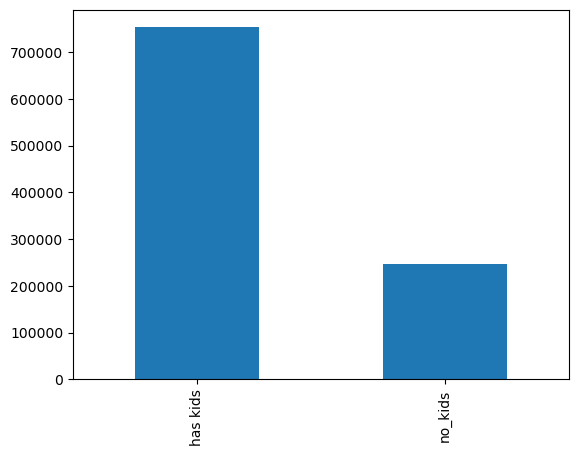

In [67]:
bar_kids = df_ords_final['kids'].value_counts().sort_index().plot.bar()

In [ ]:
# Create a pie chart for Family Status

In [71]:
df_ords_final.loc[(df_ords_final['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_ords_final['n_dependants']==0), 'family_flag'] = 'single no dependants'
df_ords_final.loc[(df_ords_final['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_ords_final['n_dependants'] >=1), 'family_flag'] = 'single with dependants'
df_ords_final.loc[(df_ords_final['fam_status'] == 'married') & (df_ords_final['n_dependants'] == 1), 'family_flag'] = 'married no dependants'
df_ords_final.loc[(df_ords_final['fam_status'] == 'married') & (df_ords_final['n_dependants'] > 1), 'family_flag'] = 'married with dependants'

In [ ]:
#Checking

In [72]:
df_ords_final['family_flag'].value_counts()

married with dependants    469453
single no dependants       246917
married no dependants      234468
single with dependants      49162
Name: family_flag, dtype: int64

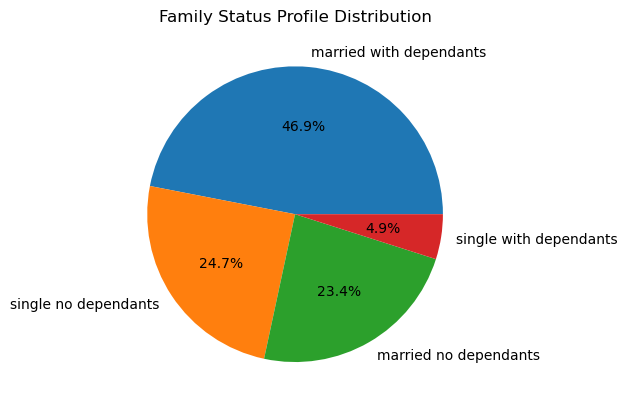

In [73]:
family_flag_pie = df_ords_final['family_flag'].value_counts().plot.pie(title = 'Family Status Profile Distribution', label = '', autopct='%1.1f%%')

In [ ]:
# Create a bar chart for Family Status and department

In [91]:
department_family=pd.crosstab(df_ords_final['department_id'],df_ords_final['family_flag'],dropna=False,)

In [92]:
department_family = department_family.sort_values(by=['married with dependants'], ascending=True)

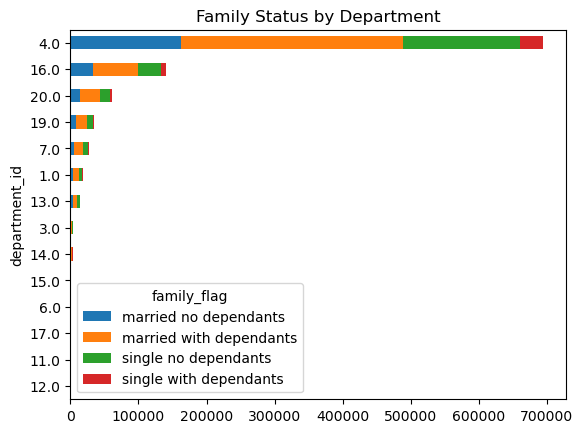

In [109]:
department_family=department_family.plot.barh(stacked=True)
plt.title('Family Status by Department')
plt.show()

In [ ]:
# Create a bar chart between Days of week and age flag

In [69]:
age_counts = df_ords_final.groupby(['orders_day_of_week','age_flag']).size().unstack(fill_value=0)

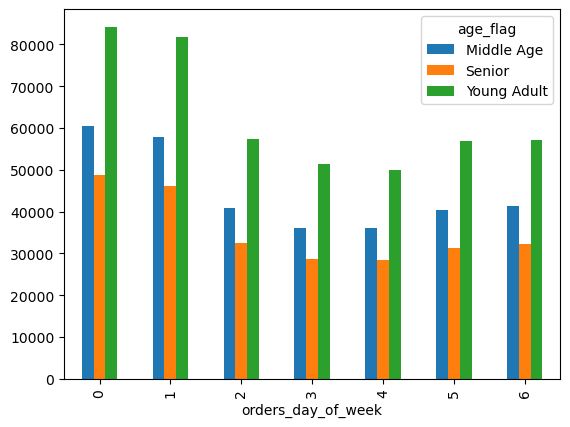

In [135]:
bar_age_counts = age_counts.plot.bar(stacked=False )

In [ ]:
# Create a bar chart between hour of day and age flag

In [81]:
age_counts_2 = df_ords_final.groupby(['order_hour_of_day','age_flag']).size().unstack(fill_value=0)

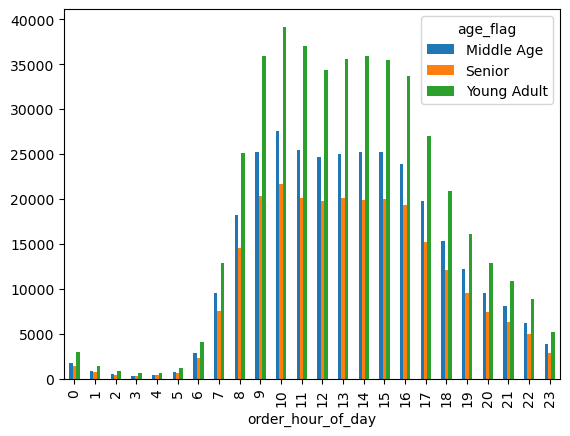

In [123]:
bar_age_counts_2 = age_counts_2.plot.bar(stacked=False )

In [ ]:
# Aggregations

In [94]:
df_ords_final.groupby('age_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_flag                        
Middle Age   7.525670  1.0  14.8
Senior       7.566327  1.0  14.8
Young Adult  7.567838  1.0  14.8

In [95]:
df_ords_final.groupby('kids').agg({'prices': ['mean', 'min', 'max']})

prices           
              mean  min   max
kids                         
has kids  7.556506  1.0  14.8
no_kids   7.547442  1.0  14.8

In [96]:
df_ords_final.groupby('income_level').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
income_level                        
High-income      7.672206  1.0  14.8
Low-income       6.660244  1.0  14.8
Moderate-income  7.479225  1.0  14.8

In [97]:
df_ords_final.groupby('fam_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
fam_status                                           
divorced/widowed                  7.543426  1.0  14.8
living with parents and siblings  7.594907  1.0  14.8
married                           7.553824  1.0  14.8
single                            7.549535  1.0  14.8

In [ ]:
# Exporting visualizations

In [125]:
age_bar.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/age_bar')

In [126]:
regions_age.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/regions_age')

In [127]:
df_dep.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/df_dep')

In [128]:
income_bar.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/income_bar')

In [129]:
regions_income.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/regions_income')

In [130]:
bar_kids.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/bar_kids')

In [131]:
family_flag_pie.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/family_flag_pie')

In [132]:
department_family.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/department_family')

In [136]:
bar_age_counts.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/bar_age_counts')

In [134]:
bar_age_counts_2.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/bar_age_counts_2')